<a href="https://colab.research.google.com/github/YHL04/CSCI4961_labs_projects/blob/main/QFT_Yi_Hung_Lim_Aidan_Westphal_James_Bialas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Discrete Fourier Transform can be thought of as a matrix-vector multiplication that turns a sequence of amplitudes $a_j$ into a sequence of $\phi_k$ where $|\phi_k|$ is the amplitude of each frequency $k$.

Fast Fourier Transform is able to calculate this in $O(N log(N))$ while Quantum Fourier Transform is able to calculate this in $O(log^2(N))$

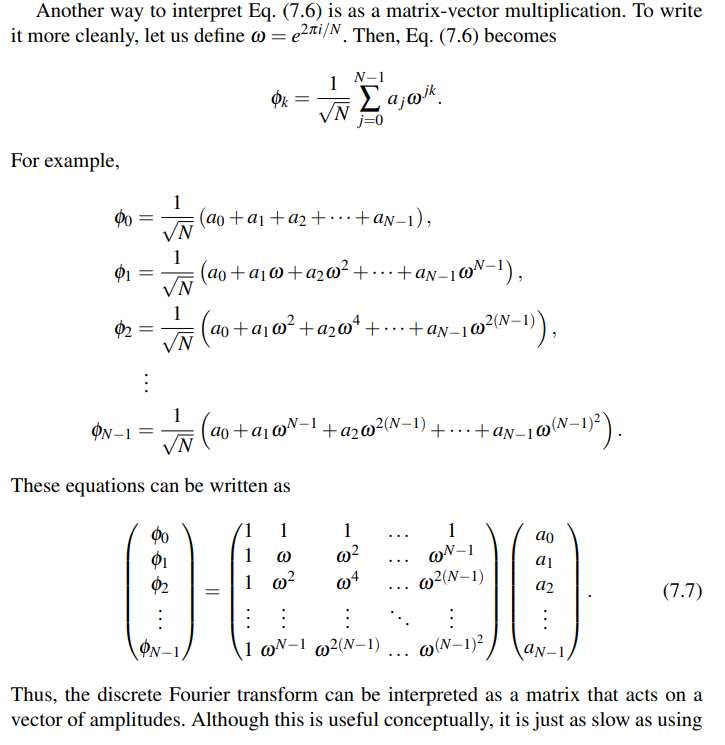

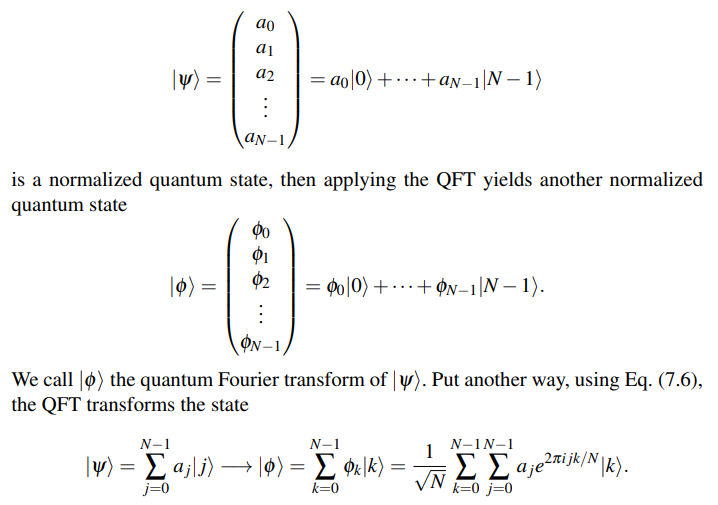

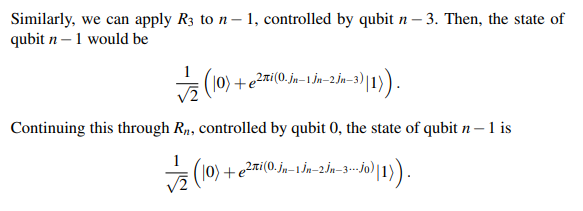

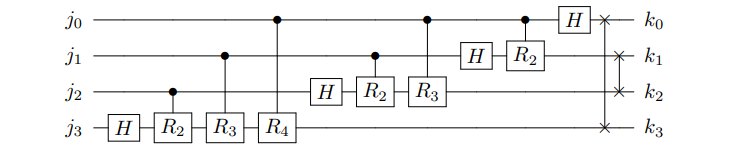

In [ ]:
!pip install qiskit
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 23.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
from qiskit import QuantumCircuit

def QFT(qc):
  """Requires a quantum circuit qc"""

  n = qc.num_qubits

  # Iterate through each target qubit from (n-1) to 0.
  for target in range(n-1, -1, -1):
    # Apply the Hadamard gate.
    qc.h(target)

    # Iterate through the control qubits from (target-1) to 0.
    for control in range(target-1, -1, -1):
      # Calculate "r," the rotation by 2*pi/2**r.
      r = target - control + 1

      # Apply the controlled phase/rotation.
      qc.cp(2*np.pi/2**r, control, target)

  # Swap qubits.
  for qubit in range(n//2):
    qc.swap(qubit, n - qubit - 1)

  return qc

In [ ]:
# PRINT AN EXAMPLE CIRCUIT WITH THE STATE |5> = |101>
example = QuantumCircuit(4)
example.x(0)
example.x(2)
example = QFT(example)
example.draw()

┌───┐                                                                ┌───┐»
q_0: ┤ X ├────────────────────────■─────────────────■─────────────■───────┤ H ├»
     └───┘                        │                 │       ┌───┐ │P(π/2) └───┘»
q_1: ───────────────■─────────────┼────────■────────┼───────┤ H ├─■─────────X──»
     ┌───┐          │       ┌───┐ │        │P(π/2)  │P(π/4) └───┘           │  »
q_2: ┤ X ├─■────────┼───────┤ H ├─┼────────■────────■───────────────────────X──»
     ├───┤ │P(π/2)  │P(π/4) └───┘ │P(π/8)                                      »
q_3: ┤ H ├─■────────■─────────────■────────────────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector

qc_measured = example.measure_all(inplace=False)

# get probability distribution of all N qubits
from qiskit.primitives.sampler import Sampler
sampler = Sampler()
job = sampler.run(qc_measured, shots=1024)
result = job.result()
print(f" > Quasi probability distribution: {result.quasi_dists}")

# check probabilities
summ = 0
for key in result.quasi_dists[0].keys():
  summ += result.quasi_dists[0][key]
print("Check total probabilities is correct: ", summ)

# get final coefficients phi_k
for key in result.quasi_dists[0].keys():
  print(f"k = {key} \t phi = {np.sqrt(result.quasi_dists[0][key])}")

 > Quasi probability distribution: [{0: 0.0595703125, 1: 0.0595703125, 2: 0.05078125, 3: 0.0634765625, 4: 0.0693359375, 5: 0.0751953125, 6: 0.0693359375, 7: 0.0615234375, 8: 0.06640625, 9: 0.05859375, 10: 0.05078125, 11: 0.0595703125, 12: 0.0673828125, 13: 0.0693359375, 14: 0.0625, 15: 0.056640625}]
Check total probabilities is correct:  1.0
k = 0 	 phi = 0.24407030237208294
k = 1 	 phi = 0.24407030237208294
k = 2 	 phi = 0.22534695471649932
k = 3 	 phi = 0.25194555463432966
k = 4 	 phi = 0.2633171804117612
k = 5 	 phi = 0.27421763710600383
k = 6 	 phi = 0.2633171804117612
k = 7 	 phi = 0.24803918541230538
k = 8 	 phi = 0.2576941016011038
k = 9 	 phi = 0.24206145913796356
k = 10 	 phi = 0.22534695471649932
k = 11 	 phi = 0.24407030237208294
k = 12 	 phi = 0.25958199571618984
k = 13 	 phi = 0.2633171804117612
k = 14 	 phi = 0.25
k = 15 	 phi = 0.23799290955824715


INITIAL STATE |3>


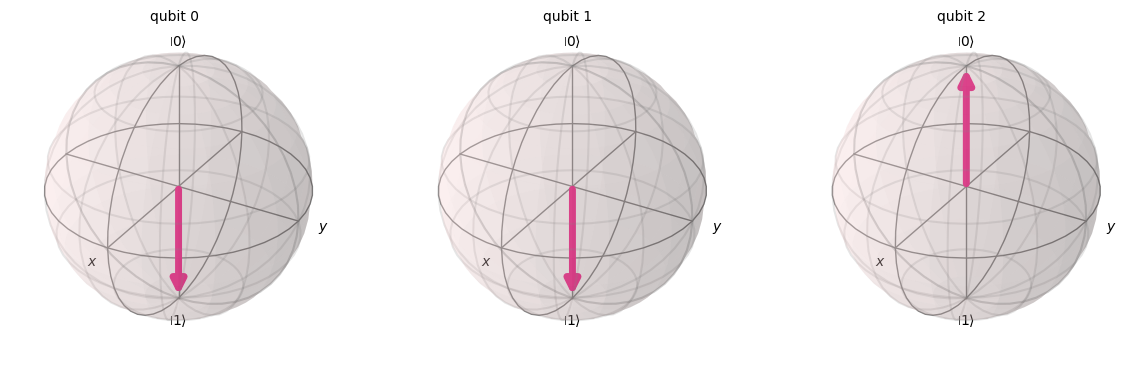

In [ ]:
from qiskit_aer import AerSimulator
sim = AerSimulator()
qc = QuantumCircuit(3)

qc3 = qc.copy()
qc3.x(0)
qc3.x(1)
qc3.save_statevector(label="INIT")
statevector = sim.run(qc3).result().data()["INIT"]
print("INITIAL STATE |3>")
plot_bloch_multivector(statevector)

QFT STATE |3>:


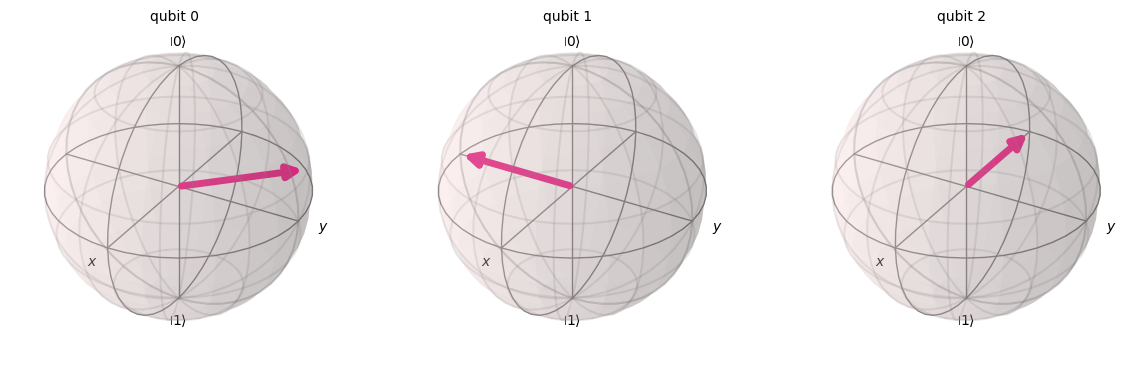

In [ ]:
QFT(qc3)
qc3.save_statevector(label="QFT")
statevector = sim.run(qc3).result().data()["QFT"]
print("QFT STATE |3>:")
plot_bloch_multivector(statevector)

INITIAL STATE |4>


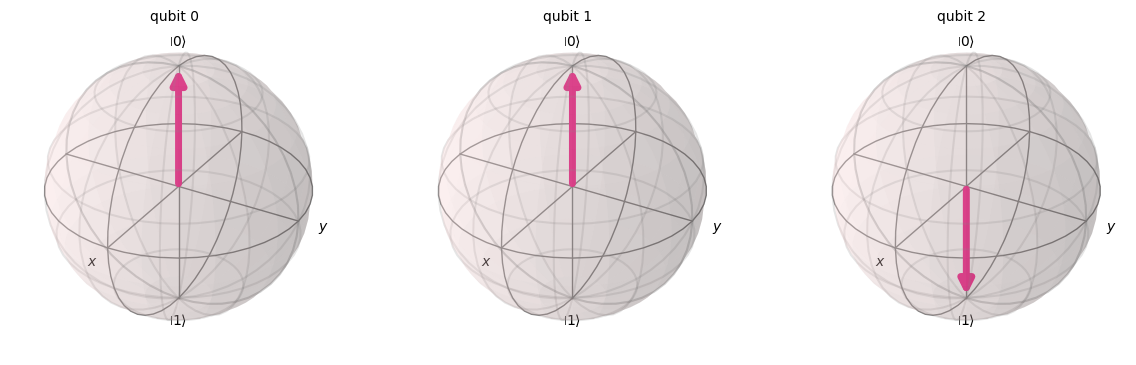

In [ ]:
qc4 = qc.copy()
qc4.x(2)
qc4.save_statevector(label="INIT")
statevector = sim.run(qc4).result().data()["INIT"]
print("INITIAL STATE |4>")
plot_bloch_multivector(statevector)

QFT STATE |4>:


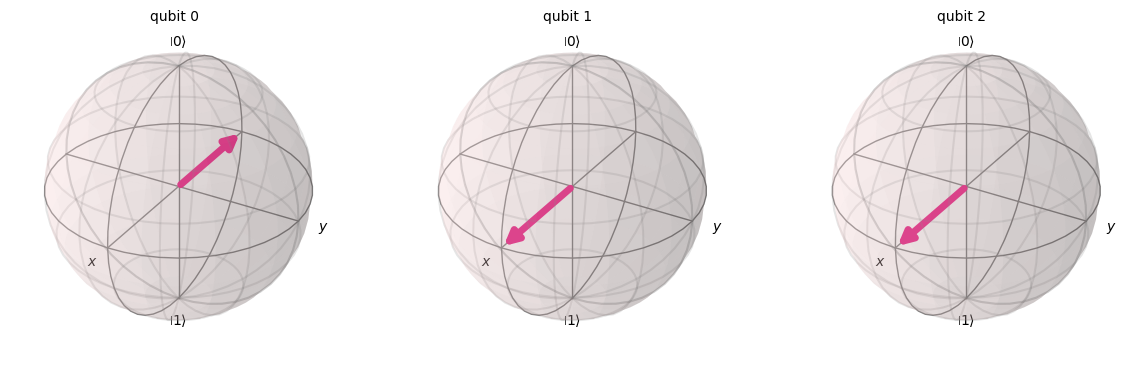

In [ ]:
QFT(qc4)
qc4.save_statevector(label="QFT")
statevector = sim.run(qc4).result().data()["QFT"]
print("QFT STATE |4>:")
plot_bloch_multivector(statevector)

INITIAL STATE |5>


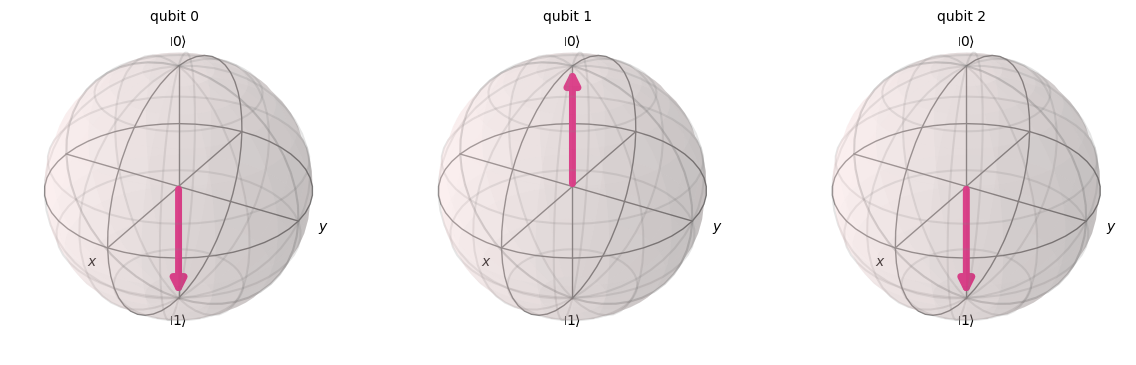

In [ ]:
qc5 = qc.copy()
qc5.x(0)
qc5.x(2)
qc5.save_statevector(label="INIT")
statevector = sim.run(qc5).result().data()["INIT"]
print("INITIAL STATE |5>")
plot_bloch_multivector(statevector)

QFT STATE |5>:


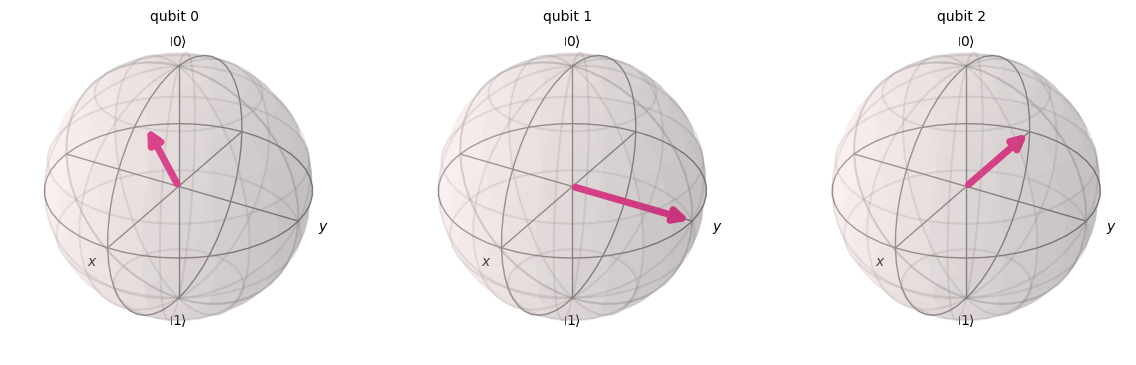

In [ ]:
QFT(qc5)
qc5.save_statevector(label="QFT")
statevector = sim.run(qc5).result().data()["QFT"]
print("QFT STATE |5>:")
plot_bloch_multivector(statevector)

In [ ]:
def IQFT(qc):
  """Requires a quantum circuit qc"""

  n = qc.num_qubits

  # Swap qubits.
  for qubit in range(n//2):
    qc.swap(qubit, n - qubit - 1)

  # Iterate through each target qubit from (n-1) to 0.
  for target in range(0,n,1):
    # Iterate through the control qubits from (target-1) to 0.
    for control in range(0, target, 1):
      # Calculate "r," the rotation by -2*pi/2**r.
      r = target - control + 1

      # Apply the controlled phase/rotation.
      qc.cp(-2*np.pi/2**r, control, target)
    # Apply the Hadamard gate.
    qc.h(target)

  # Draw the circuit.
  return qc

In [ ]:
# PRINT AN EXAMPLE CIRCUIT WITH THE STATE FROM QFT |5>
iqc = QuantumCircuit(4)
example = IQFT(iqc)
example.draw()

┌───┐                                                            »
q_0: ─X─┤ H ├─■──────────────■───────────────────■───────────────────────»
      │ └───┘ │P(-π/2) ┌───┐ │                   │                       »
q_1: ─┼───X───■────────┤ H ├─┼─────────■─────────┼──────────────■────────»
      │   │            └───┘ │P(-π/4)  │P(-π/2)  │        ┌───┐ │        »
q_2: ─┼───X──────────────────■─────────■─────────┼────────┤ H ├─┼────────»
      │                                          │P(-π/8) └───┘ │P(-π/4) »
q_3: ─X──────────────────────────────────────────■──────────────■────────»
                                                                         »
«                    
«q_0: ───────────────
«                    
«q_1: ───────────────
«                    
«q_2: ─■─────────────
«      │P(-π/2) ┌───┐
«q_3: ─■────────┤ H ├
«               └───┘

IQFT STATE |5>:


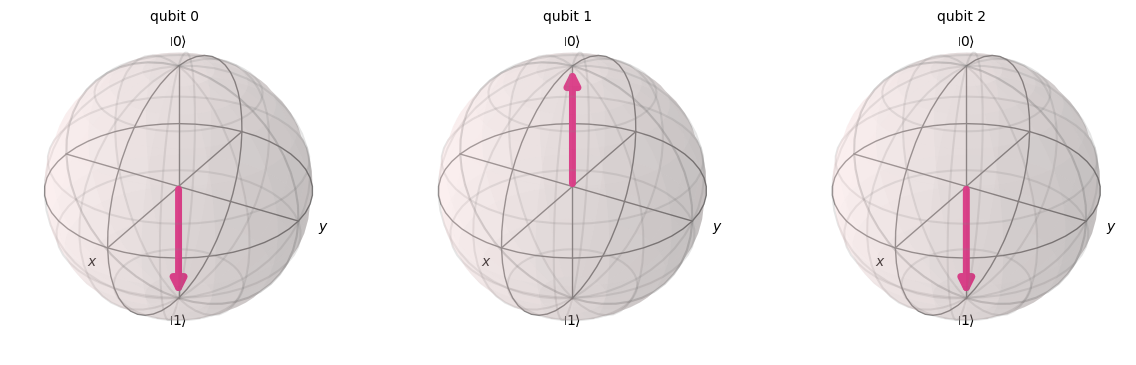

In [ ]:
# EXAMPLE: Decoding the above 3 examples

# IQFT ON QFT 5 STATE:
IQFT(qc5)
qc5.save_statevector(label="IQFT")
statevector = sim.run(qc5).result().data()["IQFT"]
print("IQFT STATE |5>:")
plot_bloch_multivector(statevector)

IQFT STATE |4>:


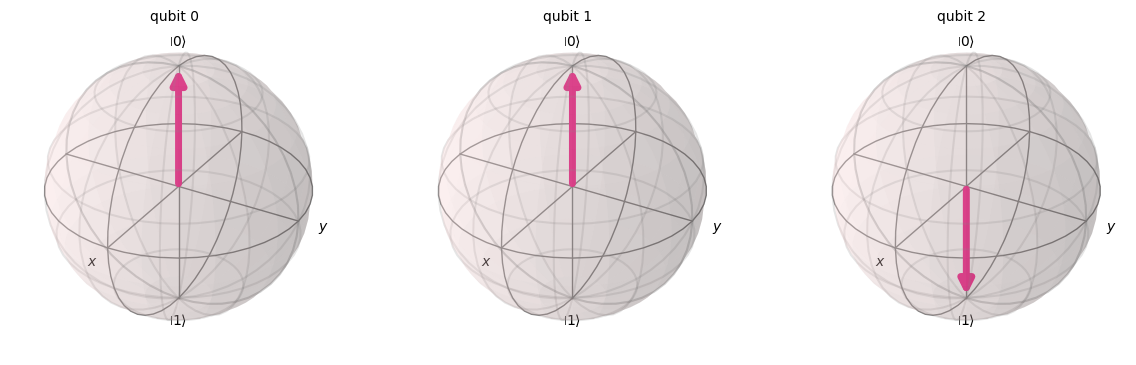

In [ ]:
# IQFT ON QFT 5 STATE:
IQFT(qc4)
qc4.save_statevector(label="IQFT")
statevector = sim.run(qc4).result().data()["IQFT"]
print("IQFT STATE |4>:")
plot_bloch_multivector(statevector)

IQFT STATE |3>:


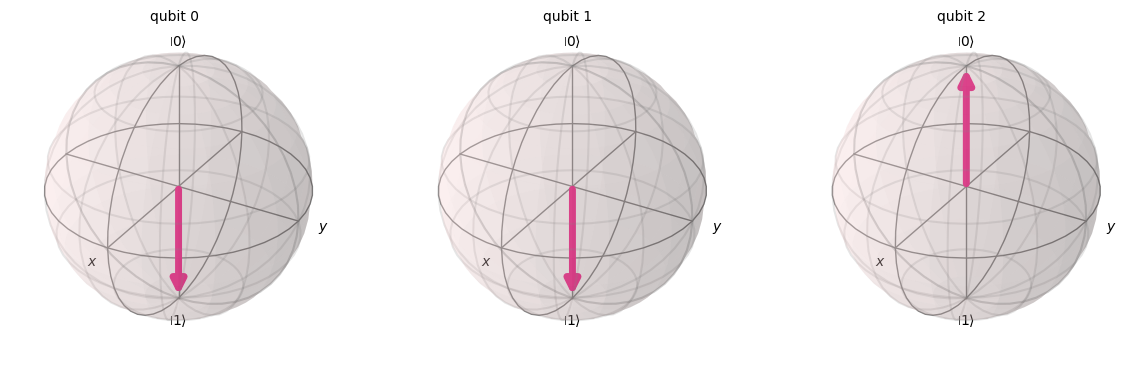

In [ ]:
# IQFT ON QFT 5 STATE:
IQFT(qc3)
qc3.save_statevector(label="IQFT")
statevector = sim.run(qc3).result().data()["IQFT"]
print("IQFT STATE |3>:")
plot_bloch_multivector(statevector)